In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve as rocc

#### Question 2.1

In [2]:
def knn(k,X_train,y_train,X_test):
    nearest = np.argmin([np.linalg.norm(X_test-train_row) for train_row in X_train])
    return y_train[nearest]

In [3]:
d2 = np.loadtxt("hw3/data/D2z.txt")
X_train = d2[:,:-1]
y_train = d2[:,-1]
x = np.arange(-2,2.1,0.1)
y = np.arange(-2,2.1,0.1)
xx,yy = np.meshgrid(x,y)
xx = xx.flatten().reshape(1681,1)
yy = yy.flatten().reshape(1681,1)
xy = np.concatenate((xx,yy),axis=1)

In [4]:
test = np.zeros_like(xx)
for i,row in enumerate(xy): 
    test[i] = knn(1,X_train,y_train,row)

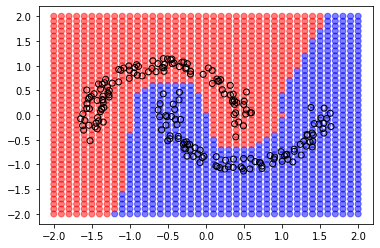

In [5]:
test = test.reshape(41,41)
plt.scatter(xx,yy,c=test,cmap="bwr",alpha=0.5)
plt.scatter(X_train[:,0],X_train[:,1],facecolor='none',edgecolor='black',marker='o')

#### Question 2.2 & 2.4

In [6]:
email = np.array(pd.read_csv("hw3/data/emails.csv",header=0,index_col=0))

In [7]:
X = email[:,:-1]
y = email[:,-1]

In [8]:
ks = [1,3,5,7,10]
#ks = [1]
avg_acc_knn = []
for k in ks:
    k_nn = KNN(n_neighbors=k,algorithm='brute')
    #clf = LogisticRegression(max_iter=1000)
    acc_knn = 0
    #acc_log = []
    #pre_log = []
    #rec_log = []
    for i in range(5):
        X_test = X[i*1000:(i+1)*1000,:]
        X_train = np.delete(X,np.s_[i*1000:(i+1)*1000],axis=0)
        y_test = y[i*1000:(i+1)*1000]
        y_train = np.delete(y,np.s_[i*1000:(i+1)*1000],axis=0)
        k_nn.fit(X_train,y_train)
        #clf.fit(X_train,y_train)
        y_pred_knn = k_nn.predict(X_test)
        #y_pred_log = clf.predict(X_test)
        #conf = confusion_matrix(y_test,y_pred_log)
        acc_knn += np.sum(y_pred_knn==y_test)/len(y_test)
        #acc_log.append(np.sum(y_pred_log==y_test)/len(y_test))
        #pre_log.append(conf[0,0]/(conf[0,0]+conf[1,0]))
        #rec_log.append(conf[0,0]/(conf[0,0]+conf[0,1]))
    avg_acc_knn.append(acc_knn/5)
for i in range(5):
    #print(acc_log[i].round(3),pre_log[i].round(3),rec_log[i].round(3))
    print(avg_acc_knn[i].round(3))

0.833
0.842
0.841
0.846
0.856


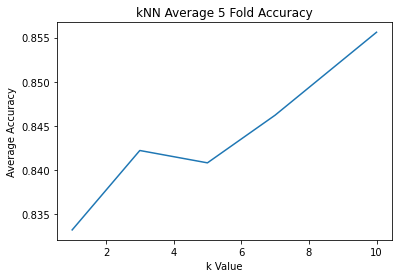

In [9]:
plt.plot(ks,avg_acc_knn)
plt.xlabel("k Value")
plt.ylabel("Average Accuracy")
plt.title("kNN Average 5 Fold Accuracy")
plt.show()

#### Question 2.3

#### Question 2.5

In [10]:
def roc_curve(test,true):
    fpr = []
    tpr = []
    val_min = test.min()
    val_max = test.max()
    range_min = val_min*0.9
    range_max = val_max*1.1
    b_vals = np.linspace(range_min,range_max,100)
    for b in b_vals:
        pred = np.array(test >= b).astype('int')
        conf_mat = confusion_matrix(pred,true)
        fpr.append(calc_FPR(conf_mat))
        tpr.append(calc_TPR(conf_mat))
    return tpr,fpr

def calc_TPR(conf_mat):
    return round(conf_mat[0,0]/(conf_mat[0,0]+conf_mat[0,1]),3)

def calc_FPR(conf_mat):
    return round(conf_mat[1,0]/(conf_mat[1,0]+conf_mat[1,1]),3)

In [11]:
logclf = LogisticRegression(max_iter=1000)
knn = KNN(n_neighbors=5,algorithm='brute')

logclf.fit(X_train,y_train)
knn.fit(X_train,y_train)

log_prob = logclf.predict_proba(X_test)
knn_prob = knn.predict_proba(X_test)

In [12]:
log_fpr, log_tpr, _ = rocc(y_test,log_prob[:,1])
knn_fpr, knn_tpr, _ = rocc(y_test,knn_prob[:,1])

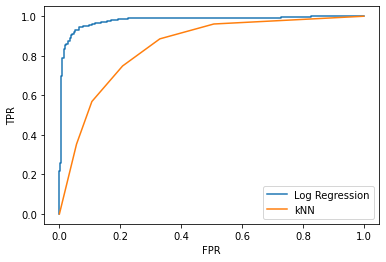

In [13]:
plt.plot(log_fpr,log_tpr)
plt.plot(knn_fpr,knn_tpr)
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(['Log Regression','kNN'])
plt.show()

In [14]:
np.sum(y_pred_knn==y_test)/len(y_test)

0.782

In [15]:
acc_log

NameError: name 'acc_log' is not defined